## VERİ OKUTMA

###### Kütüphaneleri içe aktarma

In [1]:
import pandas as pd ## Veri analizi yapmak için kullandığımız Python dilinin yazılım kütüphanesi.
import numpy as np ## Bilimsel hesaplamaları gerçekleştirmesi için çağırıyoruz.
import seaborn as sns ## İstatistiksel veri görselleştirmesini gerçekleştirmesi için çağırıyoruz.
import matplotlib.pyplot as matplot ## Veri setimizin statik, analitik vb. görsel analizini yapmak için çağırıyoruz.

from pandas import read_csv ## Veri setimizi okutmak için çağırıyoruz.

from sklearn.preprocessing import StandardScaler ## Veri setimizde yer alan uç değerleri standartlaştırarak normalize eder.
from sklearn.model_selection import train_test_split ## Veri setimizi eğitim-test datası olarak bölmesi için çağırıyoruz.

from sklearn.tree import DecisionTreeClassifier ## Karar Ağacı modellemesini kullanabilmek için çağırıyoruz.
from sklearn.neural_network import MLPClassifier ## Yapay Sinir Ağı modellemesini kullanabilmek için çağırıyoruz.
from sklearn.ensemble import RandomForestClassifier ## Rastgele Orman modellemesini kullanabilmek için çağırıyoruz.

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, precision_score, recall_score
### Doğruluk oranı, Sınıflandırma tablosu, Hassaslık-Duyarlılık oranı vb. hesaplaması için çağırıyoruz.

from sklearn.feature_selection import RFE ## Feature Selection (en iyi değişken) seçimi için çağırıyoruz.

from sklearn.model_selection import GridSearchCV ## Parametre optimizasyonu yapmak için çağırıyoruz.
from sklearn.ensemble import VotingClassifier ## Üç modellemeyi birleştirerek tek model olarak çıktı vermesi için çağırıyoruz.


###### Veri setini okutma işlemi

In [2]:
filename='glass.csv'
names=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
file = read_csv(filename, names=names)

print(file)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]


## VERİ ÖN ANALİZİ

##### Verisetinin satır-sütun sayısını öğrenme

In [3]:
print(file.shape)

(214, 10)


##### Verisetinin özniteliklerinin veri tipini öğrenme

In [4]:
type = file.dtypes
print(type)

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


##### Veri setinin istatistiğini öğrenme

In [5]:
file.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


##### Her bir tahmin sınıfında yer alan veri sayısını öğrenme

In [6]:
dt = file['Type'].value_counts()
print("1-build wind float \n2-build wind non-float \n3-vehic wind float \n5-containers \n6-tableware \n7-headlamps" '\n')
print (dt)

1-build wind float 
2-build wind non-float 
3-vehic wind float 
5-containers 
6-tableware 
7-headlamps

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64


##### Veri setinde kayıp veri kontrolü

In [7]:
file.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

##### Tahmin sınıflarındaki veri sayısının grafik analizi

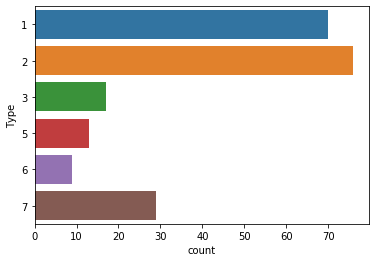

In [8]:
ax = sns.countplot(y="Type", data=file)
matplot.show()


##### Özniteliklerin dağılım grafiğini listeleme

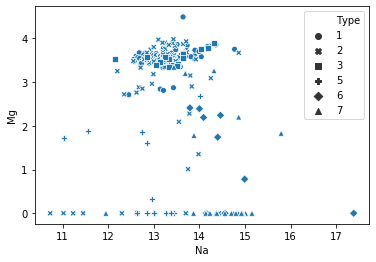

In [9]:
ax = sns.scatterplot(x="Na", y="Mg", style="Type", data=file)

##### Özniteliklerin bağlılık ilişkilerini öğrenme.

Kırmızı (+1) tonlar pozitif, Mavi (-1) tonlar negatif.


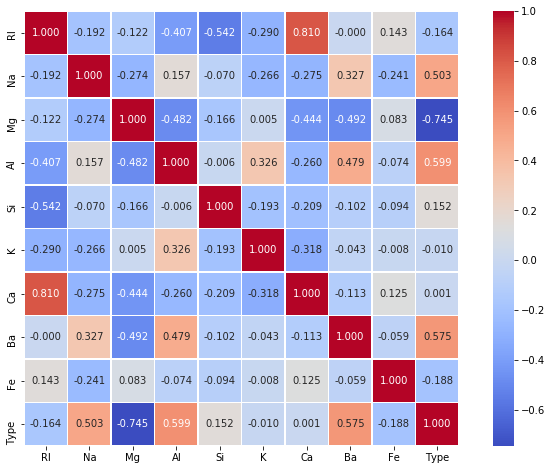

In [10]:
print("Kırmızı (+1) tonlar pozitif, Mavi (-1) tonlar negatif.")

f, ax=matplot.subplots(figsize=(12,8))

sns.heatmap(file.corr(), square=True, annot=True, linewidths=0.5, fmt='.3f', cmap='coolwarm')

#### Eğitim-test verisi oluşturmak için değişkenlere verisetinin bilgilerini aktarma

In [11]:
veri = file.values

ozellikler = veri[:,0:9]
hedef = veri[:,9]

print(ozellikler.shape)
print(hedef.shape)

(214, 9)
(214,)


## VERİYİ MODELLEMEYE HAZIRLAMA

##### Modellemeden tahmin sınıfı değişkenini çıkarma

In [12]:
ozellikler = file.loc[:,file.columns != 'Type'] 
hedef = file.loc[:,'Type']

##### Veri setini eğitim-test verisi olarak bölme

In [13]:
x_egitim, x_test, y_egitim, y_test = train_test_split(ozellikler, hedef, train_size=0.80, test_size=0.20, random_state=42)
print('Bolmemizin ardindan {} tane egitim verimiz ve {} tane test verimiz var.' '\n'.format(x_egitim.shape[0], x_test.shape[0]))

Bolmemizin ardindan 171 tane egitim verimiz ve 43 tane test verimiz var.



##### VERIYI NORMALIZE ETME (Normalizer)

In [14]:
sc = StandardScaler()

x_egitim_std = sc.fit_transform(x_egitim)
x_test_std = sc.transform(x_test)


## 1. VERİ MODELLEME (Karar Ağacı Sınıflandırması)

###### Karar ağacı modellemesini çağırma ve modelleme tahminine hazırlık

In [15]:

dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(x_egitim, y_egitim)

y_tahmin = dtc.predict(x_test)
y_tahmin2 = dtc.predict(x_egitim)


###### Tahmin sonucu yazdırma

Karar Ağacı Eğitim verisi doğruluk:  0.9883040935672515
Karar Ağacı Test verisi doğruluk:  0.7906976744186046 

Karar Ağacı Precision (Hassaslık):  0.7906976744186046
Karar Ağacı Recall (Duyarlılık):  0.8896103896103895 

Karar Ağacı F1 skoru:  0.834025234025234 

Karar Ağacı Sınıflandırma tablosu: 


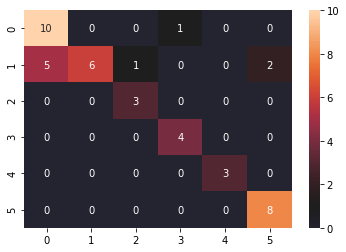

In [16]:
print('Karar Ağacı Eğitim verisi doğruluk: ', accuracy_score(y_tahmin2, y_egitim))
print('Karar Ağacı Test verisi doğruluk: ', accuracy_score(y_tahmin, y_test), '\n')

print("Karar Ağacı Precision (Hassaslık): ", precision_score(y_test, y_tahmin, average='micro'))
print("Karar Ağacı Recall (Duyarlılık): ", recall_score(y_test, y_tahmin, average='macro'), '\n')

f1skor = f1_score(y_test, y_tahmin, average='macro')
print("Karar Ağacı F1 skoru: ", f1skor, '\n')

cm = confusion_matrix(y_test, y_tahmin)
sns.heatmap(cm, center=True, annot=True, fmt="d")

print("Karar Ağacı Sınıflandırma tablosu: ")

### KARAR AĞACI İÇİN ÖZNİTELİK SEÇİMİ

In [17]:
dtc = DecisionTreeClassifier(max_depth=10)
rfe = RFE(dtc, 3)
fit = rfe.fit(x_egitim, y_egitim)

dtc.fit(x_egitim, y_egitim)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
print("Öznitelik sayısı: %d" % fit.n_features_)
print("Seçilen Öznitelikler: %s" % fit.support_)
print("Özniteliklerimiz:    ", names[0:9])
print("Öznitelik Sıralaması: %s" % fit.ranking_)

Öznitelik sayısı: 3
Seçilen Öznitelikler: [ True False  True  True False False False False False]
Özniteliklerimiz:     ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
Öznitelik Sıralaması: [1 5 1 1 7 3 4 2 6]


### Karar Ağacı için Seçilen Öznitelikler ile Modelleme

In [19]:
x2 = file[['RI', 'Mg', 'Al']]
y2 = file['Type']

x2_egitim, x2_test, y2_egitim, y2_test = train_test_split(x2, y2, test_size=0.20, random_state=42)


clf = DecisionTreeClassifier().fit(x2_egitim, y2_egitim)

Karar Ağacı Sınıflandırması için eğitim perf. 1.00
Karar Ağacı Sınıflandırması için test perf. 0.70 

Precision (Hassaslık):  0.6976744186046512
Recall (Duyarlılık):  0.6634199134199134 

F1 skor değerimiz:  0.6509803921568628 

Sınıflandırma tablosu: 


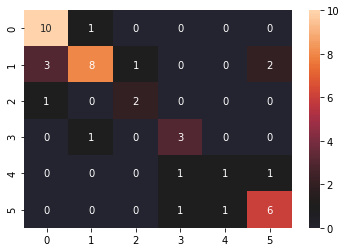

In [20]:
clf_tahmin = clf.predict(x2_test)


print("Karar Ağacı Sınıflandırması için eğitim perf. {:.2f}".format(clf.score(x2_egitim, y2_egitim)))
print("Karar Ağacı Sınıflandırması için test perf. {:.2f}".format(clf.score(x2_test, y2_test)), '\n')


print("Precision (Hassaslık): ", precision_score(y2_test, clf_tahmin, average='micro'))
print("Recall (Duyarlılık): ", recall_score(y2_test, clf_tahmin, average='macro'), '\n')

f1skor2 = f1_score(y2_test, clf_tahmin, average='macro')
print("F1 skor değerimiz: ", f1skor2, '\n')

cm = confusion_matrix(y2_test, clf_tahmin)
sns.heatmap(cm, center=True, annot=True, fmt="d")

print("Sınıflandırma tablosu: ")

### Karar Ağacı Sınıflandırması için Parametre Optimizasyonu

In [21]:
dtc = DecisionTreeClassifier()

parametre = {
    'max_depth': [1, 2, 3, 4, 5],
    'max_features':["none", "sqrt", "log2"],
    'min_samples_leaf':[1, 5, 10, 15, 20],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 3, 5, 6, 7]
}
            
dtc = GridSearchCV(estimator = dtc,
                           param_grid  = parametre,
                           cv = 10,
                           n_jobs = -1,
                           verbose=2)
dtc.fit(x_egitim, y_egitim.ravel())

Fitting 10 folds for each of 750 candidates, totalling 7500 fits


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1864 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 7399 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 7500 out of 7500 | elapsed:    6.1s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [22]:
print(dtc.best_score_)
print(dtc.best_params_)

0.6666666666666667
{'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [23]:

print('Test verisi için doğruluk oranı: ', accuracy_score(y_tahmin, y_test), '\n')

print("Precision (Hassaslık): ", precision_score(y_tahmin, y_test, average='micro'))
print("Recall (Duyarlılık): ", recall_score(y_test, y_tahmin, average='macro'), '\n')

f1skor8 = f1_score(y_test, y_tahmin, average='macro')
print("F1 skor değerimiz: ", f1skor8, '\n')



Test verisi için doğruluk oranı:  0.7906976744186046 

Precision (Hassaslık):  0.7906976744186046
Recall (Duyarlılık):  0.8896103896103895 

F1 skor değerimiz:  0.834025234025234 



## 2. VERİ MODELLEME (MultiLayer Perceptron)

MLP Eğitim doğruluk oranı:  0.935672514619883
MLP Test doğruluk oranı:  0.7906976744186046 

Precision (Hassaslık):  0.7906976744186046
Recall (Duyarlılık):  0.8007756132756132 

F1 skor değerimiz:  0.7756653839987173 

Sınıflandırma tablosu: 


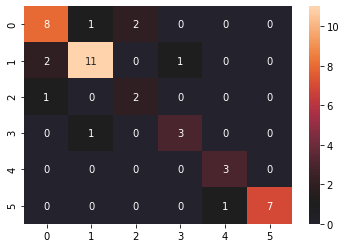

In [24]:

mlp = MLPClassifier(activation='logistic', max_iter=100000)
mlp.fit(x_egitim_std, y_egitim)

y_tahmin = mlp.predict(x_test_std)
y_tahmin2 = mlp.predict(x_egitim_std)

print('MLP Eğitim doğruluk oranı: ', accuracy_score(y_tahmin2, y_egitim))
print('MLP Test doğruluk oranı: ', accuracy_score(y_tahmin, y_test), '\n')

print("Precision (Hassaslık): ", precision_score(y_test, y_tahmin, average='micro'))
print("Recall (Duyarlılık): ", recall_score(y_test, y_tahmin, average='macro'), '\n')

f1skor31 = f1_score(y_test, y_tahmin, average='macro')
print("F1 skor değerimiz: ", f1skor31, '\n')

cm = confusion_matrix(y_test, y_tahmin)
sns.heatmap(cm, center=True, annot=True, fmt="d")

print("Sınıflandırma tablosu: ")

### MLP İÇİN ÖZNİTELİK SEÇİMİ

In [25]:
mlp = MLPClassifier(max_iter=100000)
mlprfe = RFE(mlp, 3)

mlp.fit(x_egitim, y_egitim)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [26]:

print("Öznitelik sayısı: %d" % fit.n_features_)
print("Seçilen Öznitelikler: %s" % fit.support_)
print("Özniteliklerimiz:    ", names[0:9])
print("Öznitelik Sıralaması: %s" % fit.ranking_)

Öznitelik sayısı: 3
Seçilen Öznitelikler: [ True False  True  True False False False False False]
Özniteliklerimiz:     ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
Öznitelik Sıralaması: [1 5 1 1 7 3 4 2 6]


### MLP için Seçilen Öznitelikler ile Modelleme

In [27]:
x2 = file[['RI', 'Mg', 'Al']]
y2 = file['Type']

x2_egitim, x2_test, y2_egitim, y2_test = train_test_split(x2, y2, random_state=42)

###############################################################################

mlp = MLPClassifier(max_iter=100000).fit(x2_egitim, y2_egitim)

MLP Eğitim performansı: 0.72
MLP Test performansı: 0.59 

Precision (Hassaslık):  0.5925925925925926
Recall (Duyarlılık):  0.48115079365079366 

F1 skor değerimiz:  0.43593833067517274 

Sınıflandırma tablosu: 


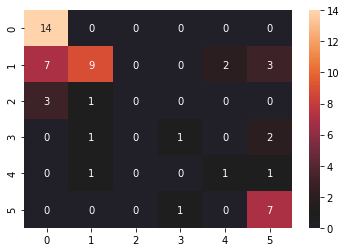

In [28]:

print("MLP Eğitim performansı: {:.2f}".format(mlp.score(x2_egitim, y2_egitim)))
print("MLP Test performansı: {:.2f}".format(mlp.score(x2_test, y2_test)), '\n')

mlp_tahmin = mlp.predict(x2_test)

print("Precision (Hassaslık): ", precision_score(y2_test, mlp_tahmin, average='micro'))
print("Recall (Duyarlılık): ", recall_score(y2_test, mlp_tahmin, average='macro'), '\n')

f1skor4 = f1_score(y2_test, mlp_tahmin, average='macro')
print("F1 skor değerimiz: ", f1skor4, '\n')

cm = confusion_matrix(y2_test, mlp_tahmin)
sns.heatmap(cm, center=True, annot=True, fmt="d")

print("Sınıflandırma tablosu: ")

### MLP için Parametre Optimizasyonu

In [29]:
parameters={
'alpha': [1,10,0.1],
'max_iter': [5000, 10000, 40000, 100000],
'activation': ["logistic", "relu"],
'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
}

mlp = MLPClassifier()

mlp_optimal = GridSearchCV(
    estimator=mlp,
    param_grid=parameters,
    n_jobs=-1,
    verbose=2,
    cv=10
    )

mlp_optimal.fit(x2_egitim, y2_egitim.ravel())

Fitting 10 folds for each of 72 candidates, totalling 720 fits


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  2.3min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...rue,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': 

In [30]:
print(mlp_optimal.best_score_)
print(mlp_optimal.best_params_)

0.68125
{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (50, 50, 50), 'max_iter': 100000}


Test verisi için doğruluk oranı:  0.6481481481481481 

Precision (Hassaslık):  0.6481481481481481
Recall (Duyarlılık):  0.6121031746031745 

F1 skor değerimiz:  0.554204323941166 

Sınıflandırma tablosu: 


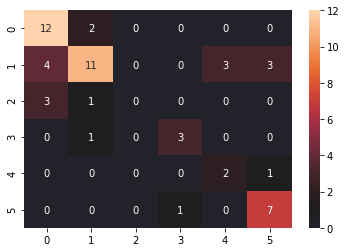

In [31]:
y_tahmin = mlp_optimal.predict(x2_test)

print('Test verisi için doğruluk oranı: ', accuracy_score(y_tahmin, y2_test), '\n')

print("Precision (Hassaslık): ", precision_score(y2_test, y_tahmin, average='micro'))
print("Recall (Duyarlılık): ", recall_score(y2_test, y_tahmin, average='macro'), '\n')

f1skor_sonn = f1_score(y2_test, y_tahmin, average='macro')
print("F1 skor değerimiz: ", f1skor_sonn, '\n')

cm = confusion_matrix(y2_test, y_tahmin)
sns.heatmap(cm, center=True, annot=True, fmt="d")

print("Sınıflandırma tablosu: ")

## 3. VERİ MODELLEME (Random Forest Classifier)

##### Random Forest modellemesini çağırma ve tahmin sonucunu yazdırma

Random Forest Eğitim verisi Doğruluk: 0.9181286549707602
Random Forest Test verisi Doğruluk:  0.813953488372093 

Random Forest Hassaslık (Precision):  0.813953488372093
Random Forest Duyarlılık (Recall):  0.7142857142857143 

Random Forest F1 skoru:  0.7535449735449736 

Sınıflandırma tablosu: 


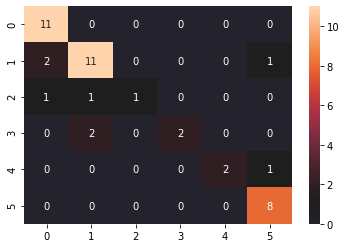

In [32]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=3)
rf.fit(x_egitim, y_egitim)

y_tahmin = rf.predict(x_test)
y_tahmin2 = rf.predict(x_egitim)

print('Random Forest Eğitim verisi Doğruluk:', accuracy_score(y_tahmin2, y_egitim))
print('Random Forest Test verisi Doğruluk: ', accuracy_score(y_tahmin, y_test), '\n')

print("Random Forest Hassaslık (Precision): ", precision_score(y_test, y_tahmin, average='micro'))
print("Random Forest Duyarlılık (Recall): ", recall_score(y_test, y_tahmin, average='macro'), '\n')

f1skor5 = f1_score(y_test, y_tahmin, average='macro')
print("Random Forest F1 skoru: ", f1skor5, '\n')

cm = confusion_matrix(y_test, y_tahmin)
sns.heatmap(cm, center=True, annot=True, fmt="d")

print("Sınıflandırma tablosu: ")


### Random Forest için Öznitelik Seçimi

In [33]:

rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=3)
rfe = RFE(rf, 3)
fit = rfe.fit(x_egitim, y_egitim)

rf.fit(x_egitim, y_egitim)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
print("Öznitelik sayısı: %d" % fit.n_features_)
print("Seçilen Öznitelikler: %s" % fit.support_)
print("Özniteliklerimiz:    ", names[0:9])
print("Öznitelik Sıralaması: %s" % fit.ranking_)

Öznitelik sayısı: 3
Seçilen Öznitelikler: [ True False  True  True False False False False False]
Özniteliklerimiz:     ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
Öznitelik Sıralaması: [1 3 1 1 4 5 2 6 7]


### Random Forest Classifier için Seçilen Öznitelikler ile Modelleme

Random Forest için eğitim perf. 1.00
Random Forest için test perf. 0.77 

Precision (Hassaslık):  0.7674418604651163
Recall (Duyarlılık):  0.6733405483405482 

F1 skor değerimiz:  0.6932844932844934 

Sınıflandırma tablosu: 


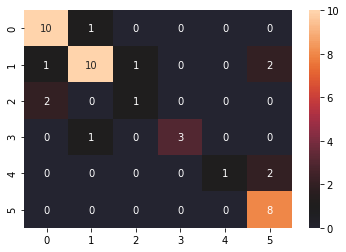

In [35]:
x2 = file[['RI', 'Mg', 'Al']]
y2 = file['Type']

x2_egitim, x2_test, y2_egitim, y2_test = train_test_split(x2, y2, test_size=0.20, random_state=42)

###############################################################################

rf = RandomForestClassifier().fit(x2_egitim, y2_egitim)
rf_tahmin = rf.predict(x2_test)


print("Random Forest için eğitim perf. {:.2f}".format(rf.score(x2_egitim, y2_egitim)))
print("Random Forest için test perf. {:.2f}".format(rf.score(x2_test, y2_test)), '\n')

print("Precision (Hassaslık): ", precision_score(y2_test, rf_tahmin, average='micro'))
print("Recall (Duyarlılık): ", recall_score(y2_test, rf_tahmin, average='macro'), '\n')

f1skor6 = f1_score(y2_test, rf_tahmin, average='macro')
print("F1 skor değerimiz: ", f1skor6, '\n')

cm = confusion_matrix(y2_test, rf_tahmin)
sns.heatmap(cm, center=True, annot=True, fmt="d")

print("Sınıflandırma tablosu: ")

### Random Forest Classifier için Parametre Optimizasyonu

In [36]:
rfparametre={
'n_estimators': [100, 200, 300, 400, 500],
'max_depth': [5, 6, 7, 9, 10],
'min_samples_leaf': [2, 3, 5, 10],
'max_features':["auto", "sqrt", "log2"]
    
}

rf = RandomForestClassifier()

rf_optimal = GridSearchCV(
    estimator=rf,
    param_grid=rfparametre,
    n_jobs=-1,
    verbose=2,
    cv=10
    )

rf_optimal.fit(x2_egitim, y2_egitim.ravel())

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  5.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [37]:
print(rf_optimal.best_score_)
print(rf_optimal.best_params_)

0.7084967320261438
{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 100}


Test verisi için doğruluk oranı:  0.7209302325581395 

Precision (Hassaslık):  0.7209302325581395
Recall (Duyarlılık):  0.5793650793650794 

F1 skor değerimiz:  0.5835802469135802 

Sınıflandırma tablosu: 


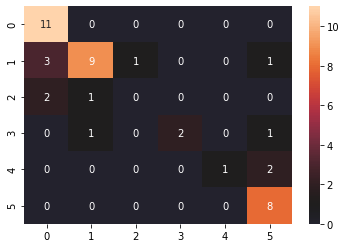

In [38]:
y_tahmin = rf_optimal.predict(x2_test)

print('Test verisi için doğruluk oranı: ', accuracy_score(y_tahmin, y2_test), '\n')

print("Precision (Hassaslık): ", precision_score(y2_test, y_tahmin, average='micro'))
print("Recall (Duyarlılık): ", recall_score(y2_test, y_tahmin, average='macro'), '\n')

f1skor_son = f1_score(y2_test, y_tahmin, average='macro')
print("F1 skor değerimiz: ", f1skor_son, '\n')

cm = confusion_matrix(y2_test, y_tahmin)
sns.heatmap(cm, center=True, annot=True, fmt="d")

print("Sınıflandırma tablosu: ")


## Modelleri tek bir modelde birleştirme (Voting_Classifier)

##### Makine öğrenmesinde kullandığımız, birleştireceğimiz modellemeleri çağırıyoruz.

In [39]:
modelleme1 = MLPClassifier(max_iter=100000)
modelleme2 = RandomForestClassifier(n_estimators=100)
modelleme3 = RandomForestClassifier(n_estimators=500)
modelleme4 = DecisionTreeClassifier()

##### Modellemeleri önem derecelerine göre sıralayıp tek model performansını ölçüyoruz.

In [40]:
model_oylamasi = VotingClassifier(estimators=[('mlp1', modelleme1), ('rfc1', modelleme2), 
                                  ('rfc2', modelleme3), ('dtc1', modelleme4)],
                                weights=[3,4,2,1], 
                                voting='soft')

model_oylamasi.fit(x2_egitim, y2_egitim)
y_tahmin = model_oylamasi.predict(x2_test)

print("Test verisi için doğruluk: ", accuracy_score(y_tahmin, y2_test))

Test verisi için doğruluk:  0.7674418604651163
